In [2]:
from dbase import *

In [3]:
subjects_1_3_idx=[] #to store indices of subjects with jacobians of classes 1 or 3
labels=[]

#only subject indices with all jacobians of the same class (1 or 3) are stored
for s in range(0,len(Subjects)):
    counter1 = 0
    counter3 = 0
    for i in range(0,len(Subjects[s].jacobians)):
        if Subjects[s].jacobians[i].label == 1:
            counter1 = counter1 + 1
        if Subjects[s].jacobians[i].label == 3:
            counter3 = counter3 + 1
    if (counter1 == len(Subjects[s].jacobians) or counter3 == len(Subjects[s].jacobians)) and len(Subjects[s].jacobians) > 0:
        subjects_1_3_idx.append(s)
        if counter3 > counter1:
            labels.append(3)
        else:
            labels.append(1)

print("the list has a total of ", len(subjects_1_3_idx), " indices.")

the list has a total of  124  indices.


In [4]:
# we build the X matrix including 1 random jacobian from controls and preclinicals (all jacobians class 1 or 3)
#X=np.load('/home/miquel/ForMiquel/CLEAN2/X.npy')
#print(np.shape(X))
import nibabel as nib
from imports_func import *
X1 = np.zeros((121*145*121))
X2 = np.zeros((121*145*121))
X3 = np.zeros((121*145*121))
jac_idx_1j=[]
#subjects_identifiers = []
aux1 = 'wmaskedc1_'
aux2 = 'wmaskedc2_'
aux3 = 'wmaskedc3_'
counter = 0
for idx in subjects_1_3_idx:
    print(counter)
    i = np.random.randint(0,len(Subjects[idx].jacobians))
    j = Subjects[idx].jacobians[i]
    jac_idx_1j.append(i)
    path1 = j.jb.replace(j.jb.split('/')[-1], aux1 + j.jb.split('/')[-1])
    path2 = j.jb.replace(j.jb.split('/')[-1], aux2 + j.jb.split('/')[-1])   
    path3 = j.jb.replace(j.jb.split('/')[-1], aux3 + j.jb.split('/')[-1])
    if path1[-1] == 'i' :
        path1 = path1 + '.gz'
    if path2[-1] == 'i' :
        path2 = path2 + '.gz'
    if path3[-1] == 'i' :
        path3 = path3 + '.gz'

    img1 = nib.load(path1)
    img1 = img1.get_data()
    img2 = nib.load(path2)
    img2 = img2.get_data()
    img3 = nib.load(path3)
    img3 = img3.get_data()
        
    img1 = np.reshape(img1, 121*145*121, 1)
    img2 = np.reshape(img2, 121*145*121, 1)
    img3 = np.reshape(img3, 121*145*121, 1)
    #line = np.append(img1, np.append(img2,img3))
    X1 = np.vstack((X1, img1))
    X2 = np.vstack((X2, img2))
    X3 = np.vstack((X3, img3))
    #subjects_identifiers.append(idx)
    counter = counter + 1
        
X1=X1[1:,:]
X2=X2[1:,:]
X3=X3[1:,:]

X = X1 + X2
mask1=np.all(np.equal(X,0), axis=0)
#mask2=np.all(np.equal(X2,0), axis=0)
#mask3=np.all(np.equal(X3,0), axis=0)
X = X1[:,~mask1]
#X2 = X2[:,~mask2]
#X3 = X3[:,~mask3]

print(np.shape(X))
print(np.shape(jac_idx_1j))
np.save('/home/miquel/ForMiquel/CLEAN2/X_c1_1j_full2', X)
np.save('/home/miquel/ForMiquel/CLEAN2/zero_cols_X_full2',mask1)
#np.save('/home/miquel/ForMiquel/CLEAN2/X_c2_1j_full', X2
#np.save('/home/miquel/ForMiquel/CLEAN2/X_c2_1j_full', X2)
#np.save('/home/miquel/ForMiquel/CLEAN2/zero_cols_JB_c2_1j',mask2)
#np.save('/home/miquel/ForMiquel/CLEAN2/X_c3_1j_full', X3)
#np.save('/home/miquel/ForMiquel/CLEAN2/zero_cols_JB_c3_1j',mask3)
np.save('/home/miquel/ForMiquel/CLEAN2/jac_idx_1j_full2', jac_idx_1j)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
(124, 572738)
(124,)


In [2]:
X=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j.npy') 
#X2=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j.npy')
#X3=np.load('/home/miquel/ForMiquel/CLEAN2/X_c3_1j.npy')
#X=np.concatenate((X1, X2), axis=1)
#X=np.concatenate((X, X3), axis=1)
y=np.load('/home/miquel/ForMiquel/CLEAN2/y_short.npy') #subject labels
sub_id_short=np.load('/home/miquel/ForMiquel/CLEAN2/sub_id_short.npy') #subject idxs

In [8]:
from imports_func import * 
spl = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in spl.split(X, y_short): #split in subjects
    X_train = X[train_index,:]
    X_test = X[test_index,:]
    y_train = y[train_index]
    y_test = y[test_index]

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


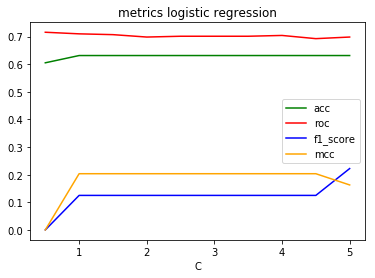

[[22  1]
 [13  2]]


In [24]:
from imports_func import * 

# load dataset:
X_dt=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j_dt.npy') 
X=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j.npy') 
#X2=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j.npy')
#X=np.concatenate((X1, X2), axis=1)

y=np.load('/home/miquel/ForMiquel/CLEAN2/y_short.npy') #subject labels

# Split the dataset
spl = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=39)
for train_index, test_index in spl.split(X, y): #split in subjects
    X_train = X[train_index,:]
    X_test = X_dt[test_index,:]
    y_train = y[train_index]
    y_test = y[test_index]

C = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
#C = [0.01,10]
acc_linear = []
roc_linear = []
f1_linear = []
mcc_linear = []


for i in C:
    clf = SVC(kernel='linear', probability = True, C=i)
    clf = LogisticRegression(solver='liblinear', penalty='l2', C=i)

    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    roc=roc_auc_score(y_test, y_score)
    f1=f1_score(y_test, pred)
    from sklearn.metrics import matthews_corrcoef
    mcc=matthews_corrcoef(y_test, pred)

    acc_linear.append(acc)
    roc_linear.append(roc)
    f1_linear.append(f1)
    mcc_linear.append(mcc)

plt.figure(1)
plt.plot(C, acc_linear, color='green', label='acc')
plt.plot(C, roc_linear, color='red', label='roc')
plt.plot(C, f1_linear, color='blue', label='f1_score')
plt.plot(C, mcc_linear, color='orange', label='mcc')

plt.legend(loc='best')
plt.xlabel('C')
plt.title('metrics logistic regression')
plt.show()
print(confusion_matrix(y_test, pred))



In [72]:
from imports_func import * 
X=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j_dt.npy') 
y=np.load('/home/miquel/ForMiquel/CLEAN2/y_short.npy')

spl = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in spl.split(X, y): #split in subjects
    X_train = X[train_index,:]
    X_test = X[test_index,:]
    y_train = y[train_index]
    y_test = y[test_index]
    
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=False, min_samples_leaf=1, min_samples_split=5, max_features=1000, max_depth=10)
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))
from sklearn.metrics import matthews_corrcoef
mcc=matthews_corrcoef(y_test, pred)
print(mcc)
print(y_test)
print(pred)



0.526315789474
-0.0406121124583
[0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1
 1]
[1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0]


In [73]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

from imports_func import * 
X=np.load('/home/miquel/ForMiquel/CLEAN2/X_c3_1j.npy') 
y=np.load('/home/miquel/ForMiquel/CLEAN2/y_short.npy')

spl = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in spl.split(X, y): #split in subjects
    X_train = X[train_index,:]
    X_test = X[test_index,:]
    y_train = y[train_index]
    y_test = y[test_index]
#Create a Gaussian Classifier
clf = GaussianNB()

# Train the model using the training sets 
y_score = clf.fit(X_train, y_train).predict_proba(X_test)
roc=roc_auc_score(y_test, y_score[:,1])
f1=f1_score(y_test, pred)
#Predict Output 
pred= clf.predict(X_test)
from sklearn.metrics import matthews_corrcoef
mcc=matthews_corrcoef(y_test, pred)
print(accuracy_score(y_test, pred))
print(roc)
print(f1)
print(mcc)
print(y_test)
print(pred)

0.552631578947
0.468115942029
0.307692307692
-0.101564907916
[0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1
 1]
[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0]


0.631578947368
0.68115942029
0.111111111111
0.203571710808


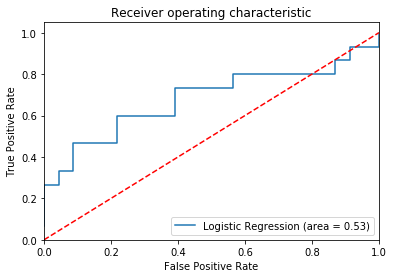

In [25]:
from imports_func import * 
#X1=np.load('/home/miquel/ForMiquel/CLEAN2/X_c1_1j_dt.npy')
X_dt=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j_dt.npy')
X=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j.npy')
#X=np.concatenate((X1, X2), axis=1)
y=np.load('/home/miquel/ForMiquel/CLEAN2/y_short.npy')

spl = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in spl.split(X, y): #split in subjects
    X_train = X[train_index,:]
    X_test = X_dt[test_index,:]
    y_train = y[train_index]
    y_test = y[test_index]
clf = LogisticRegression(solver='liblinear', penalty='l2', C=10)
# Train the model using the training sets 
y_score = clf.fit(X_train, y_train).predict_proba(X_test)
roc=roc_auc_score(y_test, y_score[:,1])
f1=f1_score(y_test, pred)
#Predict Output 
pred= clf.predict(X_test)
from sklearn.metrics import matthews_corrcoef
mcc=matthews_corrcoef(y_test, pred)
print(accuracy_score(y_test, pred))
print(roc)
print(f1)
print(mcc)
confusion_matrix(y_test, pred)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [116]:
X=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j.npy')
X_dt=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j_dt.npy')
y=np.load('/home/miquel/ForMiquel/CLEAN2/y_short.npy')
spl = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in spl.split(X, y): #split in subjects
    X_train = X[train_index,:]
    X_test = X[test_index,:]
    y_train = y[train_index]
    y_test = y[test_index]
    

In [63]:
np.shape(X_train)

(86, 565765)

In [99]:
from imports_func import *
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVC(kernel="linear", C=100)
#estimator = LogisticRegression(solver='liblinear', penalty='l2', C=100)
selector = RFE(estimator, 150000, step=100000)
selector = selector.fit(X_train, y_train)
X_train = X_train[:,selector.support_]
X_test = X_test[:,selector.support_]

In [91]:
np.shape(X_train)

(86, 150000)

In [117]:
clf = SVC(kernel="linear", C=10000)
#clf = LogisticRegression(solver='liblinear', penalty='l2', C=100)

y_score = clf.fit(X_train, y_train).decision_function(X_test)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
roc=roc_auc_score(y_test, y_score)
f1=f1_score(y_test, pred)
from sklearn.metrics import matthews_corrcoef
mcc=matthews_corrcoef(y_test, pred)

print(acc)
print(roc)
print(f1)
print(mcc)
confusion_matrix(y_test, pred)


0.605263157895
0.63768115942
0.210526315789
0.0738653875754


array([[21,  2],
       [13,  2]])

In [8]:
from imports_func import *
from sklearn.feature_selection import VarianceThreshold
X1=np.load('/home/miquel/ForMiquel/CLEAN2/X_c1_1j_dt.npy')
#X2=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2_1j_dt.npy')
#X3=np.load('/home/miquel/ForMiquel/CLEAN2/X_c3_1j_dt.npy')
y=np.load('/home/miquel/ForMiquel/CLEAN2/y_short.npy')

# Create VarianceThreshold object with a variance with a threshold 
thresholder1 = VarianceThreshold(threshold=.00008)
thresholder2 = VarianceThreshold(threshold=.00006)
thresholder3 = VarianceThreshold(threshold=.0002)



# Conduct variance thresholding
X1 = thresholder1.fit_transform(X1)
#X2 = thresholder2.fit_transform(X2)
#X3 = thresholder3.fit_transform(X3)
print(np.shape(X1))
#print(np.shape(X2))
#print(np.shape(X3))

X=X1
#X=np.concatenate((X1, X2), axis=1)
#X=np.concatenate((X, X3), axis=1)

spl = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=4)
for train_index, test_index in spl.split(X, y): #split in subjects
    X_train = X[train_index,:]
    X_test = X[test_index,:]
    y_train = y[train_index]
    y_test = y[test_index]
    
clf = SVC(kernel="linear", C=10000)
#clf = LogisticRegression(solver='liblinear', penalty='l2', C=100)

y_score = clf.fit(X_train, y_train).decision_function(X_test)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
roc=roc_auc_score(y_test, y_score)
f1=f1_score(y_test, pred)
from sklearn.metrics import matthews_corrcoef
mcc=matthews_corrcoef(y_test, pred)

print(acc)
print(roc)
print(f1)
print(mcc)
confusion_matrix(y_test, pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
print(np.shape(thresholds))
print(thresholds)
print(precision)
print(recall)


(124, 43475)
0.657894736842
0.501449275362
0.48
0.250960886314
(38,)
[-2.01915456 -1.97430145 -1.65480588 -1.33682673 -1.33379311 -1.25734193
 -1.03383094 -0.89459582 -0.89071647 -0.79049447 -0.76022442 -0.68225109
 -0.62854009 -0.57771566 -0.55695987 -0.55115831 -0.54525726 -0.39540842
 -0.31422711 -0.30906827 -0.28460929 -0.24255184 -0.20698587 -0.20212629
 -0.1266958  -0.0761036  -0.04708064 -0.01316793  0.02324147  0.06404231
  0.10977906  0.11030468  0.16083539  0.17354028  0.17845235  0.26523339
  0.55216612  1.47521757]
[ 0.39473684  0.37837838  0.36111111  0.34285714  0.35294118  0.36363636
  0.375       0.35483871  0.36666667  0.34482759  0.35714286  0.37037037
  0.34615385  0.32        0.33333333  0.34782609  0.36363636  0.38095238
  0.4         0.42105263  0.38888889  0.41176471  0.4375      0.46666667
  0.5         0.46153846  0.5         0.54545455  0.6         0.55555556
  0.625       0.57142857  0.66666667  0.6         0.5         0.66666667
  0.5         1.          1. 

In [5]:
jac_idx=np.load('/home/miquel/ForMiquel/CLEAN2/jac_idx_1j_full2.npy') #subject labels
y=[]
for i in range(0, len(subjects_1_3_idx)):
    if Subjects[subjects_1_3_idx[i]].jacobians[jac_idx[i]].label == 1:
        y.append(0)
    if Subjects[subjects_1_3_idx[i]].jacobians[jac_idx[i]].label == 3:
        y.append(1)
    


In [6]:
print(y)
np.shape(y)
np.save('/home/miquel/ForMiquel/CLEAN2/y_1j_full2', y)

[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0]
